# Numerical Analysis for Non-Linear Optimization | Module 1

## Random Number Generators: Implementation and Applications

### 1. Introduction

Random number generators (RNGs) are crucial in **scientific computing**, playing a significant role in **Monte Carlo simulations**, **machine learning**, and **statistical analysis**. This module focuses on implementing and applying random number generators efficiently in numerical methods.

---

### 2. Implementing Random Number Generators in Python

#### 2.1 Using NumPy's Modern PRNG API

In [1]:
import numpy as np

# Initialize PRNG with a fixed seed for reproducibility
rng = np.random.default_rng(42)
rand_nums = rng.random(10)  # Generate 10 uniform random numbers in [0,1)
print(rand_nums)

[0.77395605 0.43887844 0.85859792 0.69736803 0.09417735 0.97562235
 0.7611397  0.78606431 0.12811363 0.45038594]


#### 2.2 Generating Secure Random Numbers

In [2]:
import secrets
import string


def generate_password(length=12):  # Generate a secure password
    chars = string.ascii_letters + string.digits + string.punctuation
    return "".join(secrets.choice(chars) for _ in range(length))


print("Secure Password:", generate_password())

Secure Password: hyz|08\GtxF^


---

### 3. Statistical Analysis & Testing Randomness

To validate the quality of RNGs, statistical tests such as **Kolmogorov-Smirnov (KS) test** and **histogram analysis** can be performed.

#### 3.1 Kolmogorov-Smirnov Test for Uniformity

In [3]:
from scipy.stats import kstest

samples = rng.random(1000)  # Generate 1000 uniform random samples
ks_stat, p_value = kstest(samples, "uniform")  # Perform KS test
print(f"KS Test Statistic: {ks_stat}, P-value: {p_value}")

KS Test Statistic: 0.023093132123466364, P-value: 0.6516710583520398


#### 3.2 Visualization: Histogram and Distribution

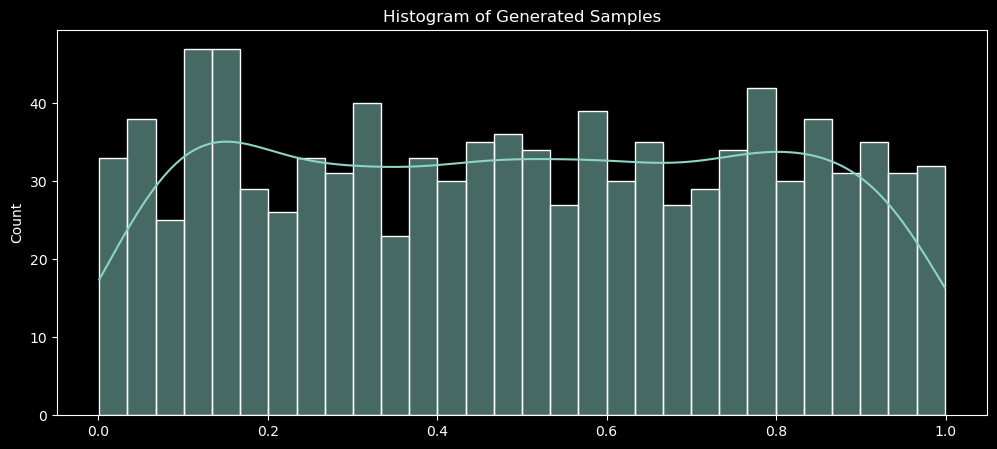

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(samples, bins=30, kde=True)
plt.title("Histogram of Generated Samples")
plt.show()

---

### 4. Monte Carlo Simulations & Efficiency Enhancements

Monte Carlo methods use randomness to approximate deterministic problems.

#### 4.1 Estimating π Using Monte Carlo

In [ ]:
from numba import njit, prange


@njit(parallel=True)  # Optimize function with parallel processing
def monte_carlo_pi(n):
    count = 0
    for i in prange(n):
        x, y = np.random.random(), np.random.random()
        if x**2 + y**2 <= 1:
            count += 1
    return (count / n) * 4


print("Estimated Pi:", monte_carlo_pi(1000000))

#### 4.2 Monte Carlo Convergence Analysis

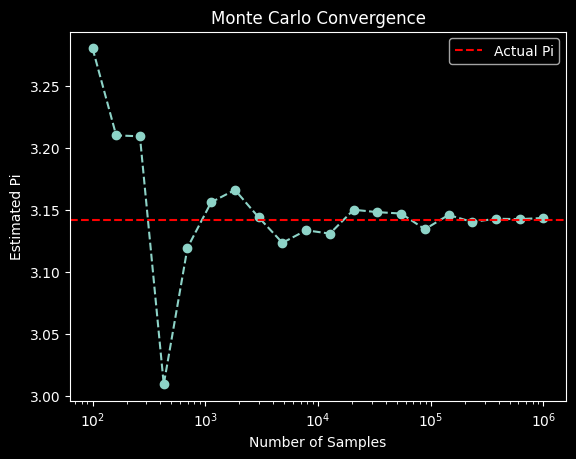

: 

In [ ]:
n_values = np.logspace(2, 6, num=20, dtype=int)
pi_estimates = [monte_carlo_pi(n) for n in n_values]
plt.plot(n_values, pi_estimates, marker="o", linestyle="dashed")
plt.xscale("log")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Actual Pi")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated Pi")
plt.legend()
plt.title("Monte Carlo Convergence")
plt.show()

---

### 5. Real-World Applications of Random Number Generators

#### 5.1 Financial Modeling: Stock Price Simulation Using Brownian Motion

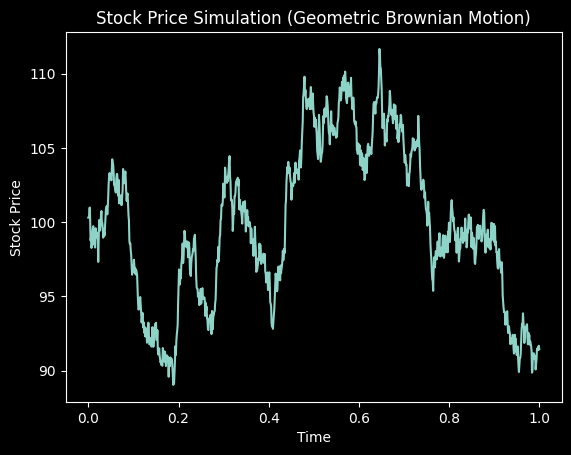

In [7]:
T, N, S0, mu, sigma = 1, 1000, 100, 0.05, 0.2
dt = T / N
t = np.linspace(0, T, N)
brownian_motion = np.cumsum(np.random.randn(N) * np.sqrt(dt))
stock_prices = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * brownian_motion)

plt.plot(t, stock_prices)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Simulation (Geometric Brownian Motion)")
plt.show()

---

### 6. Conclusion

Random number generators are essential in numerous domains, from simulations to statistical modeling. By leveraging statistical tests and efficiency techniques like Monte Carlo convergence, computational accuracy and reliability are significantly enhanced.

---

### 7. Exercises

#### Basic Random Number Generation

1. Generate a 10x10 array of uniform random numbers and compute its mean and standard deviation.
2. Generate 20 random integers between 1 and 10 and count their frequencies.

#### Statistical Distributions

1. Generate and plot samples from exponential and binomial distributions.
2. Perform a KS test on a sample of normally distributed random numbers.

#### Advanced Applications

1. Implement a Monte Carlo integration for $\int_0^1 \sin(x)dx$ and compare its accuracy with numerical integration.
2. Use simulated annealing with random numbers to find the minimum of a function.